In [2]:
pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=f4e9426b14e5d32e204ab83792b376516c205463a67d2d92f7192367eecb8dde
  Stored in directory: c:\users\shindongwha\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.



* 학습용 데이터로 측정한 정확도 = 0.83
* 시험용 데이터로 측정한 정확도 = 0.80


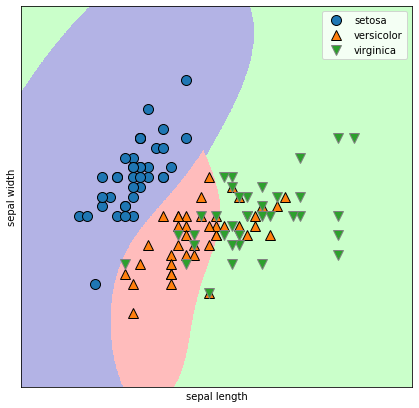

optG = 0.40
optC = 0.40
optAcc = 0.87

* 학습용 데이터로 측정한 정확도 = 0.80
* 시험용 데이터로 측정한 정확도 = 0.87


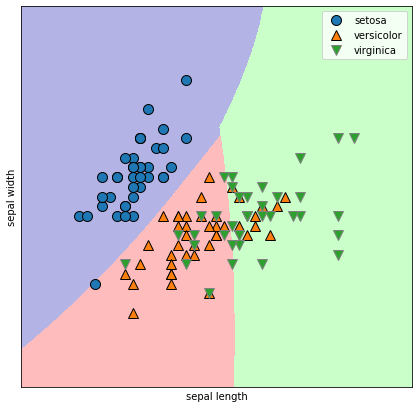

In [3]:
# linear-SVM으로 iris 데이터를 학습한다.
# -------------------------------------
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
import numpy as np

iris = load_iris()

# 시각화를 위해 sepal length와 sepal width 만 사용한다.
x = iris.data[:, [0, 1]] # colume 0과 1만 사용함.
y = iris.target

# Train 데이터 세트와 Test 데이터 세트를 구성한다
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

# SVM으로 Train 데이터 세트를 학습한다.
model = SVC(kernel='rbf', gamma=1.0, C=5.0)
model.fit(trainX, trainY)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
print()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(trainX, trainY))
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(testX, testY))

# 시각화
plt.figure(figsize=[7,7])
mglearn.plots.plot_2d_classification(model, trainX, alpha=0.3)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

# gamma와 C의 조합을 바꿔가면서 학습 데이터의 정확도가 최대인 조합을 찾는다
optAcc = -999
optG = 0
optC = 0
for gamma in np.arange(0.1, 5.0, 0.1):
    for c in np.arange(0.1, 5.0, 0.1):
        model = SVC(kernel='rbf', gamma=gamma, C=c)
        model.fit(trainX, trainY)
        acc = model.score(testX, testY)
        
        if acc > optAcc:
            optG = gamma
            optC = c
            optAcc = acc

print('optG = %.2f' % optG)
print('optC = %.2f' % optC)
print('optAcc = %.2f' % optAcc)

# 최적 조건으로 학습한 결과를 확인한다.
model = SVC(kernel='rbf', gamma=optG, C=optC)
model.fit(trainX, trainY)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
print()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(trainX, trainY))
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(testX, testY))

# 시각화
plt.figure(figsize=[7,7])
mglearn.plots.plot_2d_classification(model, trainX, alpha=0.3)
mglearn.discrete_scatter(trainX[:,0], trainX[:,1], trainY)
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

